In [8]:
#Decision Tree

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN  # Corrected import for SMOTE + ENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, matthews_corrcoef)
import time


In [9]:
# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

In [10]:

# Define SMOTE + ENN
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)

In [11]:
# Apply the hybrid technique (SMOTE + ENN)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)


In [12]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)


# Start timing the training process
start_time = time.time()

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time


SMOTE + ENN Decision Tree Performance:
Accuracy: 0.9431078591216977
MCC: 0.8824
Time Taken: 2.6424 seconds
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     30992
         1.0       0.95      0.95      0.95     44449

    accuracy                           0.94     75441
   macro avg       0.94      0.94      0.94     75441
weighted avg       0.94      0.94      0.94     75441



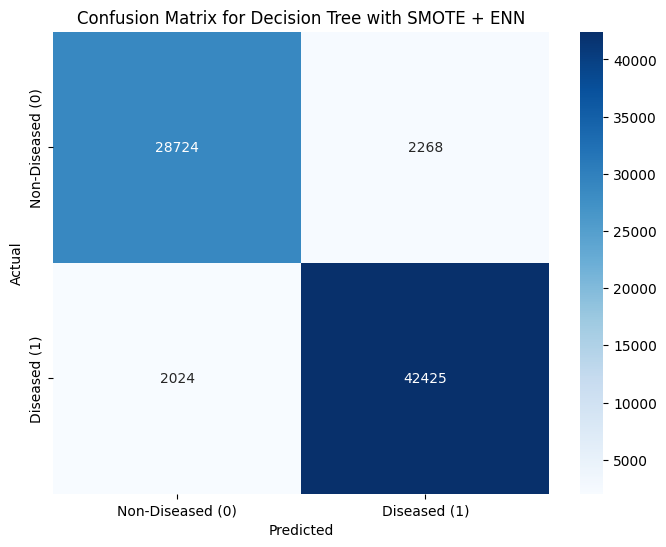

Sensitivity: 0.9545
Specificity: 0.9268


In [13]:




# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)



print("SMOTE + ENN Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f"MCC: {mcc:.4f}")
print(f"Time Taken: {training_time:.4f} seconds")
print(classification_report(y_test, y_pred_dt))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Decision Tree with SMOTE + ENN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN  # Corrected import for SMOTE + ENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, matthews_corrcoef)
import time

In [ ]:
# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

In [ ]:
# Define SMOTE + ENN
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)



# Apply the hybrid technique (SMOTE + ENN)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
)
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply Hybrid SMOTE + ENN for resampling
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42, smote=SMOTE(random_state=42), enn=EditedNearestNeighbours())
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Start timing the training process
start_time = time.time()

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Decision Tree Performance (Hybrid SMOTE + ENN):")
print(f"Accuracy: {accuracy:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Time Taken: {training_time:.4f} seconds")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diseased (0)', 'Diseased (1)'], 
            yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Decision Tree (Hybrid SMOTE + ENN)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


SMOTE + ENN Random Forest Performance:
Accuracy: 0.9641
MCC: 0.9262
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     30992
         1.0       0.98      0.96      0.97     44449

    accuracy                           0.96     75441
   macro avg       0.96      0.96      0.96     75441
weighted avg       0.96      0.96      0.96     75441



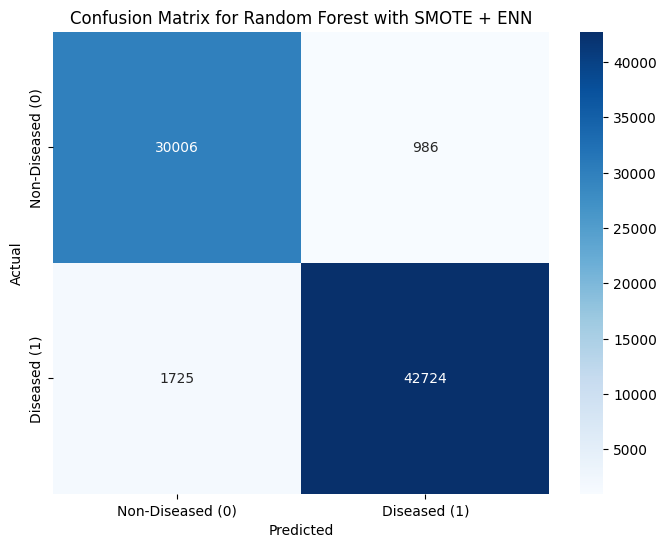

Sensitivity: 0.9612
Specificity: 0.9682
Time taken for training: 57.5501 seconds


In [1]:
import pandas as pd
from imblearn.combine import SMOTEENN  # Corrected import for SMOTE + ENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Define SMOTE + ENN
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)

# Apply the hybrid technique (SMOTE + ENN)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Start timing the training process
start_time = time.time()

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

# Print performance metrics
print("SMOTE + ENN Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred_rf))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Random Forest with SMOTE + ENN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Display training time
print(f"Time taken for training: {training_time:.4f} seconds")
